In [ ]:
!pip install pytorch-ignite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import Subset
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, RandomResizedCrop, RandomVerticalFlip, RandomHorizontalFlip
from torchvision.transforms import ColorJitter, ToTensor, Normalize
from torchvision import transforms
from torchvision.models import resnet50, ResNet50_Weights

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

import torchvision as tv

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/smokingVSnotsmoking.zip' -d train_set_dir
train_set_dir = '/content/train_set_dir/smokingVSnotsmoking'

Archive:  /content/drive/MyDrive/smokingVSnotsmoking.zip
   creating: train_set_dir/smokingVSnotsmoking/dataset/
   creating: train_set_dir/smokingVSnotsmoking/dataset/testing_data/
  inflating: train_set_dir/smokingVSnotsmoking/dataset/testing_data/abc001.jpg  
  inflating: train_set_dir/smokingVSnotsmoking/dataset/testing_data/abc002.jpg  
  inflating: train_set_dir/smokingVSnotsmoking/dataset/testing_data/abc003.jpg  
  inflating: train_set_dir/smokingVSnotsmoking/dataset/testing_data/abc004.jpg  
  inflating: train_set_dir/smokingVSnotsmoking/dataset/testing_data/abc005.jpg  
  inflating: train_set_dir/smokingVSnotsmoking/dataset/testing_data/abc006.jpg  
  inflating: train_set_dir/smokingVSnotsmoking/dataset/testing_data/abc007.jpg  
  inflating: train_set_dir/smokingVSnotsmoking/dataset/testing_data/abc008.jpg  
  inflating: train_set_dir/smokingVSnotsmoking/dataset/testing_data/abc009.jpg  
  inflating: train_set_dir/smokingVSnotsmoking/dataset/testing_data/abc010.jpg  
  inflat

In [ ]:
for file_p in os.listdir('/content/train_set_dir/smokingVSnotsmoking/dataset/training_data/smoking'):
  if str(type(cv2.imread(f'/content/train_set_dir/smokingVSnotsmoking/dataset/training_data/smoking/{file_p}'))) != "<class 'NoneType'>":
    # print(type(cv2.imread(f'/content/train_set_dir/smokingVSnotsmoking/dataset/training_data/smoking/{file_p}')))
    continue
  else:
#     if file_p == '.ipynb_checkpoints':
#       shutil.rmtree(f'/content/train_set_dir/dataset/smoking/{file_p}')
    os.remove(f'/content/train_set_dir/smokingVSnotsmoking/dataset/training_data/smoking/{file_p}')

In [ ]:
for file_p in os.listdir('/content/train_set_dir/smokingVSnotsmoking/dataset/training_data/notsmoking'):
  # print(type(cv2.imread(f'/content/train_set_dir/smokingVSnotsmoking/dataset/training_data/notsmoking/{file_p}')))
  if str(type(cv2.imread(f'/content/train_set_dir/smokingVSnotsmoking/dataset/training_data/notsmoking/{file_p}'))) != "<class 'NoneType'>":
    continue
  else:
    # print(file_p)
#     if file_p == '.ipynb_checkpoints':
#       shutil.rmtree(f'/content/train_set_dir/dataset/smoking/{file_p}')
    os.remove(f'/content/train_set_dir/smokingVSnotsmoking/dataset/training_data/notsmoking/{file_p}')

In [ ]:
for file_p in os.listdir('/content/train_set_dir/smokingVSnotsmoking/dataset/validation_data/smoking'):
  if str(type(cv2.imread(f'/content/train_set_dir/smokingVSnotsmoking/dataset/validation_data/smoking/{file_p}'))) != "<class 'NoneType'>":
    # print(type(cv2.imread(f'/content/train_set_dir/smokingVSnotsmoking/dataset/training_data/smoking/{file_p}')))
    continue
  else:
#     if file_p == '.ipynb_checkpoints':
#       shutil.rmtree(f'/content/train_set_dir/dataset/smoking/{file_p}')
    os.remove(f'/content/train_set_dir/smokingVSnotsmoking/dataset/validation_data/smoking/{file_p}')

In [ ]:
for file_p in os.listdir('/content/train_set_dir/smokingVSnotsmoking/dataset/validation_data/notsmoking'):
  # print(type(cv2.imread(f'/content/train_set_dir/smokingVSnotsmoking/dataset/training_data/notsmoking/{file_p}')))
  if str(type(cv2.imread(f'/content/train_set_dir/smokingVSnotsmoking/dataset/validation_data/notsmoking/{file_p}'))) != "<class 'NoneType'>":
    continue
  else:
    # print(file_p)
#     if file_p == '.ipynb_checkpoints':
#       shutil.rmtree(f'/content/train_set_dir/dataset/smoking/{file_p}')
    os.remove(f'/content/train_set_dir/smokingVSnotsmoking/dataset/validation_data/notsmoking/{file_p}')

In [ ]:
train_transform_changed = transforms.Compose([
        transforms.Resize(144),
        transforms.CenterCrop(144),
        ColorJitter(brightness=0.12),
        transforms.RandomRotation(degrees=(-45, 45)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

train_transform_normal = transforms.Compose([
        transforms.Resize(144),
        transforms.CenterCrop(144),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

val_transform = transforms.Compose([
        transforms.Resize(144),
        transforms.CenterCrop(144),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

In [ ]:
batch_size = 24
num_workers = 8

train_dataset_changed = ImageFolder(r'/content/train_set_dir/smokingVSnotsmoking/dataset/training_data', transform=train_transform_changed, target_transform=None)
train_dataset_normal = ImageFolder(r'/content/train_set_dir/smokingVSnotsmoking/dataset/training_data', transform=train_transform_normal, target_transform=None)

train_dataset = train_dataset_changed + train_dataset_normal
val_dataset = ImageFolder(r'/content/train_set_dir/smokingVSnotsmoking/dataset/validation_data', transform=val_transform, target_transform=None)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers,
                          drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True,
                        num_workers=num_workers,
                        drop_last=False)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


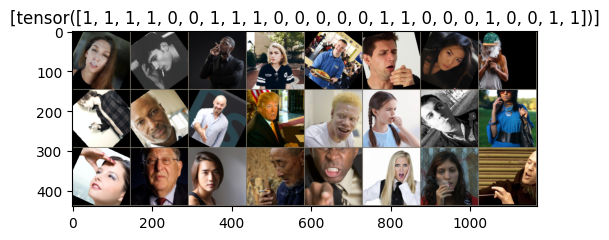

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(6, 4))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)



inputs, classes = next(iter(train_loader))

out = tv.utils.make_grid(inputs)

imshow(out, title=[classes])

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.act = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv0 = nn.Conv2d(3, 16, 3, stride = 1, padding = 1)
        self.conv1 = nn.Conv2d(16, 32, 3, stride = 1, padding = 1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(64, 128, 3, stride = 1, padding = 1)

        self.adapt = nn.AdaptiveAvgPool2d((1,1))
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(128, 16)
        self.linear2 = nn.Linear(16, 2)

    def forward(self, x):

        out = self.conv0(x)
        out = self.act(out)
        out = self.pool(out)

        out = self.conv1(out)
        out = self.act(out)
        out = self.pool(out)

        out = self.conv2(out)
        out = self.act(out)
        out = self.pool(out)

        out = self.conv3(out)
        out = self.act(out)

        out = self.adapt(out)
        out = self.flatten(out)
        out = self.linear1(out)
        out = self.act(out)
        out = self.linear2(out)


        return out


In [ ]:
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 247MB/s]


In [ ]:
# model = ConvNet()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, betas = (0.9, 0.999))

In [ ]:
from ignite.engine import Engine, _prepare_batch


def process_function(engine, batch):
    model.train()
    optimizer.zero_grad()
    x, y = _prepare_batch(batch)
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    return loss.item()

trainer = Engine(process_function)

In [ ]:
from ignite.metrics import Loss, Precision, Recall, Accuracy

metrics = {
    'avg_loss': Loss(criterion),
    'avg_accuracy': Accuracy(),
    'avg_precision': Precision(average=True),
    'avg_recall': Recall(average=True)
}

In [ ]:
from ignite.engine import create_supervised_evaluator

train_evaluator = create_supervised_evaluator(model, metrics=metrics)
val_evaluator = create_supervised_evaluator(model, metrics=metrics)

In [ ]:
from ignite.engine import Events

In [ ]:
import numpy as np
from torch.utils.data.dataset import Subset

indices = np.arange(len(train_dataset))
random_indices = np.random.permutation(indices)[:len(val_dataset)]
train_subset = Subset(train_dataset, indices=random_indices)

train_eval_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True,
                                num_workers=num_workers,
                                drop_last=True)

In [ ]:
@trainer.on(Events.EPOCH_COMPLETED)
def compute_and_display_offline_train_metrics(engine):
    epoch = engine.state.epoch
    print("Compute train metrics...")
    metrics = train_evaluator.run(train_eval_loader).metrics
    print("Training Results - Epoch: {}  Average Loss: {:.4f} | Accuracy: {:.4f} | Precision: {:.4f} | Recall: {:.4f}"
          .format(engine.state.epoch,
                      metrics['avg_loss'],
                      metrics['avg_accuracy'],
                      metrics['avg_precision'],
                      metrics['avg_recall']))

@trainer.on(Events.EPOCH_COMPLETED)
def compute_and_display_val_metrics(engine):
    epoch = engine.state.epoch
    print("Compute validation metrics...")
    metrics = val_evaluator.run(val_loader).metrics
    print("Validation Results - Epoch: {}  Average Loss: {:.4f} | Accuracy: {:.4f} | Precision: {:.4f} | Recall: {:.4f}"
          .format(engine.state.epoch,
                      metrics['avg_loss'],
                      metrics['avg_accuracy'],
                      metrics['avg_precision'],
                      metrics['avg_recall']))

In [ ]:
output = trainer.run(train_loader, max_epochs=20)

In [ ]:
def predim(path):
  img = cv2.imread((path), cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype(np.float32)/255
  img = cv2.resize(img,(144, 144), interpolation = cv2.INTER_AREA)

  img = img.transpose((2,0,1))

  t_img = torch.from_numpy(img)
  predict = F.softmax(model(torch.from_numpy(np.expand_dims(t_img.numpy(), axis = 0))))
  print(F.softmax(model(torch.from_numpy(np.expand_dims(t_img.numpy(), axis = 0)))))
  return predict

In [ ]:
predict = str(predim('/content/train_set_dir/smokingVSnotsmoking/dataset/training_data/smoking/smoking_0009.jpg'))
chance = predict[9:15]

In [ ]:
orig_img = cv2.imread('/content/train_set_dir/smokingVSnotsmoking/dataset/training_data/smoking/smoking_0009.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

In [ ]:
TT = transforms.ToTensor()
TN = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
img = TT(orig_img)
img = TN(img)
imshow(img)
print(f"\nШанс, того, что на изображении нет курения равен {round(float(chance) * 100,2)}%")

In [ ]:
correct = 0
total = 0
with torch.no_grad():
   for data in train_loader:
     images, labels = data
     outputs = model(images)
     _, predicted = torch.max(outputs.data, 1)
     total += labels.size(0)
     correct += (predicted == labels).sum().item()

print(f'Model accuracy: {100 * correct // total} %')